In [1]:
# ============================================================================
# 🎯 TASK 3: FEATURE ENGINEERING PIPELINE - SETUP AND IMPORTS
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
import sys
import os

# Visualization settings
plt.style.use('default')
sns.set_palette("husl")
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold',
    'figure.titlesize': 18,
    'figure.titleweight': 'bold',
    'legend.fontsize': 10,
    'figure.figsize': (12, 8),
    'figure.dpi': 100
})

warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully")
print(f"Python version: {sys.version}")
print(f"Pandas version: {pd.__version__}")

✅ Libraries imported successfully
Python version: 3.11.3 (tags/v3.11.3:f3909b8, Apr  4 2023, 23:49:59) [MSC v.1934 64 bit (AMD64)]
Pandas version: 2.3.3


In [2]:
# ============================================================================
# 📥 LOAD YOUR EXACT DATA
# ============================================================================

print("\n" + "="*80)
print("🔍 FINDING YOUR DATA FILE")
print("="*80)

current_dir = Path.cwd()
print(f"Current directory: {current_dir}")

# List all possible paths where your data might be
possible_paths = [
    current_dir / "data" / "processed" / "cleaned_data.csv",
    current_dir.parent.parent / "data" / "processed" / "cleaned_data.csv",
    current_dir.parent / "data" / "processed" / "cleaned_data.csv",
    Path("data/processed/cleaned_data.csv"),
    Path("../data/processed/cleaned_data.csv"),
    Path("../../data/processed/cleaned_data.csv"),
    Path("../../../data/processed/cleaned_data.csv")
]

# Check each path
cleaned_data_path = None
for i, path in enumerate(possible_paths, 1):
    exists = path.exists()
    print(f"{i:2d}. {path} {'✅ EXISTS' if exists else '❌ Not found'}")
    if exists:
        cleaned_data_path = path
        print(f"   File size: {path.stat().st_size:,} bytes")

if cleaned_data_path is None:
    print("\n❌ ERROR: cleaned_data.csv not found!")
    print("\nPlease make sure your data file is in one of these locations.")
    print("If it's elsewhere, modify the path in the next cell.")
else:
    print(f"\n✅ Will load data from: {cleaned_data_path}")


🔍 FINDING YOUR DATA FILE
Current directory: d:\10 acadamy\Credit Risk  Model\notebooks\task3
 1. d:\10 acadamy\Credit Risk  Model\notebooks\task3\data\processed\cleaned_data.csv ❌ Not found
 2. d:\10 acadamy\Credit Risk  Model\data\processed\cleaned_data.csv ✅ EXISTS
   File size: 19,259,923 bytes
 3. d:\10 acadamy\Credit Risk  Model\notebooks\data\processed\cleaned_data.csv ❌ Not found
 4. data\processed\cleaned_data.csv ❌ Not found
 5. ..\data\processed\cleaned_data.csv ❌ Not found
 6. ..\..\data\processed\cleaned_data.csv ✅ EXISTS
   File size: 19,259,923 bytes
 7. ..\..\..\data\processed\cleaned_data.csv ❌ Not found

✅ Will load data from: ..\..\data\processed\cleaned_data.csv


In [3]:
# ============================================================================
# 📂 LOAD THE DATA FILE
# ============================================================================

if cleaned_data_path and cleaned_data_path.exists():
    print("\n" + "="*80)
    print("📊 LOADING DATA")
    print("="*80)
    
    try:
        # Try loading with parse_dates for TransactionStartTime
        df = pd.read_csv(cleaned_data_path, parse_dates=['TransactionStartTime'])
        print(f"✅ Data loaded successfully!")
        print(f"   Shape: {df.shape}")
        print(f"   Columns: {len(df.columns)}")
        print(f"   Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        
        # Show basic info
        print("\n📋 FIRST FEW ROWS:")
        print(df.head())
        
        print("\n📊 COLUMN INFORMATION:")
        print(df.info())
        
        print("\n🔢 DATA TYPES:")
        print(df.dtypes.value_counts())
        
        print("\n📅 DATE COLUMNS:")
        date_cols = df.select_dtypes(include=['datetime64']).columns.tolist()
        print(f"   Date columns found: {date_cols}")
        
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        print("\nTrying without parse_dates...")
        
        # Try loading without parse_dates
        df = pd.read_csv(cleaned_data_path)
        print(f"✅ Data loaded (without date parsing)")
        print(f"   Shape: {df.shape}")
        print(df.head())
        
else:
    print("\n❌ Cannot load data - file not found.")
    print("Please check the path and run cell 2 again to find your data.")


📊 LOADING DATA
✅ Data loaded successfully!
   Shape: (95662, 21)
   Columns: 21
   Memory usage: 71.86 MB

📋 FIRST FEW ROWS:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988 

In [4]:

# ============================================================================
# EXPLORE DATA STRUCTURE
# ============================================================================

print("\n" + "="*80)
print("🔍 EXPLORING DATA STRUCTURE")
print("="*80)

print("\n1. COLUMN ANALYSIS:")
print(f"   Total columns: {len(df.columns)}")
print(f"   Numeric columns: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"   Categorical columns: {len(df.select_dtypes(include=['object']).columns)}")
print(f"   Datetime columns: {len(df.select_dtypes(include=['datetime']).columns)}")

print("\n2. REQUIRED COLUMNS CHECK:")
required_cols = ['CustomerId', 'Value', 'TransactionStartTime']
for col in required_cols:
    if col in df.columns:
        print(f"   ✅ {col}")
    else:
        print(f"   ❌ {col} (MISSING)")

print("\n3. DATA QUALITY METRICS:")
# Check for duplicates
duplicate_rows = df.duplicated().sum()
duplicate_customers = df['CustomerId'].duplicated().sum() if 'CustomerId' in df.columns else 0
print(f"   Duplicate rows: {duplicate_rows:,}")
print(f"   Duplicate CustomerId entries: {duplicate_customers:,}")

# Check date range
if 'TransactionStartTime' in df.columns:
    print(f"   Date range: {df['TransactionStartTime'].min()} to {df['TransactionStartTime'].max()}")
    print(f"   Date span: {(df['TransactionStartTime'].max() - df['TransactionStartTime'].min()).days} days")

# Check transaction values
if 'Value' in df.columns:
    print(f"\n4. TRANSACTION VALUE ANALYSIS:")
    print(f"   Total value: ${df['Value'].sum():,.2f}")
    print(f"   Average value: ${df['Value'].mean():,.2f}")
    print(f"   Min value: ${df['Value'].min():,.2f}")
    print(f"   Max value: ${df['Value'].max():,.2f}")
    print(f"   Std dev: ${df['Value'].std():,.2f}")
    
    # Check for negative values (possible refunds)
    negative_values = (df['Value'] < 0).sum()
    if negative_values > 0:
        print(f"   ⚠️  Negative values: {negative_values:,} (possible refunds)")

print("\n5. CUSTOMER ANALYSIS:")
if 'CustomerId' in df.columns:
    unique_customers = df['CustomerId'].nunique()
    print(f"   Unique customers: {unique_customers:,}")
    print(f"   Transactions per customer: {len(df) / unique_customers:.1f}")
    
    # Top 5 customers by transaction count
    top_customers = df['CustomerId'].value_counts().head(5)
    print(f"   Top 5 customers by transaction count:")
    for cust, count in top_customers.items():
        print(f"      {cust}: {count:,} transactions")


🔍 EXPLORING DATA STRUCTURE

1. COLUMN ANALYSIS:
   Total columns: 21
   Numeric columns: 10


   Categorical columns: 10
   Datetime columns: 0

2. REQUIRED COLUMNS CHECK:
   ✅ CustomerId
   ✅ Value
   ✅ TransactionStartTime

3. DATA QUALITY METRICS:
   Duplicate rows: 0
   Duplicate CustomerId entries: 91,920
   Date range: 2018-11-15 02:18:49+00:00 to 2019-02-13 10:01:28+00:00
   Date span: 90 days

4. TRANSACTION VALUE ANALYSIS:
   Total value: $947,109,661.00
   Average value: $9,900.58
   Min value: $2.00
   Max value: $9,880,000.00
   Std dev: $123,122.09

5. CUSTOMER ANALYSIS:
   Unique customers: 3,742
   Transactions per customer: 25.6
   Top 5 customers by transaction count:
      CustomerId_7343: 4,091 transactions
      CustomerId_3634: 2,085 transactions
      CustomerId_647: 1,869 transactions
      CustomerId_1096: 784 transactions
      CustomerId_4033: 778 transactions


In [5]:
# ============================================================================
# 🔧 CREATE AGGREGATE FEATURES - REQUIREMENT 1
# ============================================================================

print("\n" + "="*80)
print("🔧 CREATING AGGREGATE FEATURES")
print("="*80)

# Check if we have the required columns
print("Checking required columns...")
required_columns = ['CustomerId', 'Value']
missing_cols = [col for col in required_columns if col not in df.columns]

if missing_cols:
    print(f"❌ Missing required columns: {missing_cols}")
    print(f"Available columns: {list(df.columns)}")
else:
    print(f"✅ All required columns found!")
    
    # Create aggregate features per customer
    print("\nCreating customer aggregates...")
    
    # Group by CustomerId
    customer_aggregates = df.groupby('CustomerId').agg({
        'Value': ['sum', 'mean', 'std', 'count']
    })
    
    # Flatten column names
    customer_aggregates.columns = [
        'total_transaction_amount',
        'avg_transaction_amount',
        'std_transaction_amount',
        'transaction_count'
    ]
    
    # Fill NaN values for std
    customer_aggregates['std_transaction_amount'] = customer_aggregates['std_transaction_amount'].fillna(0)
    
    # Reset index
    customer_aggregates = customer_aggregates.reset_index()
    
    print(f"✅ Created aggregates for {len(customer_aggregates):,} unique customers")
    print("\n📊 AGGREGATE FEATURES SUMMARY:")
    print(customer_aggregates.describe())
    
    # Show first few rows
    print("\n📋 SAMPLE OF AGGREGATE FEATURES:")
    print(customer_aggregates.head(10))


🔧 CREATING AGGREGATE FEATURES
Checking required columns...
✅ All required columns found!

Creating customer aggregates...


✅ Created aggregates for 3,742 unique customers

📊 AGGREGATE FEATURES SUMMARY:
       total_transaction_amount  avg_transaction_amount  \
count              3.742000e+03            3.742000e+03   
mean               2.531025e+05            1.875612e+04   
std                2.715877e+06            1.674529e+05   
min                5.000000e+01            5.000000e+01   
25%                6.500000e+03            1.160655e+03   
50%                3.200000e+04            3.950000e+03   
75%                1.020600e+05            7.096039e+03   
max                1.049000e+08            8.601821e+06   

       std_transaction_amount  transaction_count  
count            3.742000e+03        3742.000000  
mean             1.274420e+04          25.564404  
std              9.692118e+04          96.929602  
min              0.000000e+00           1.000000  
25%              3.695603e+02           2.000000  
50%              2.799236e+03           7.000000  
75%              4.253973e+03   

In [6]:
# ============================================================================
# 📊 VISUALIZATION FUNCTION
# ============================================================================

def save_and_show_visualization(filename):
    """
    Save and display visualization
    """
    # Create reports directory
    reports_dir = Path("reports/task3_visualizations")
    reports_dir.mkdir(parents=True, exist_ok=True)
    
    # Save figure
    save_path = reports_dir / filename
    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    print(f"✅ Visualization saved to: {save_path}")
    
    # Show plot
    plt.show()
    
    # Clear figure for next plot
    plt.clf()
    plt.close()


📊 VISUALIZATION: AGGREGATE FEATURES (Display Only)
📋 Data Summary:
• Total customers: 3,742
• Features: ['CustomerId', 'total_transaction_amount', 'avg_transaction_amount', 'std_transaction_amount', 'transaction_count']

✅ DISPLAYING VISUALIZATION IN NOTEBOOK...


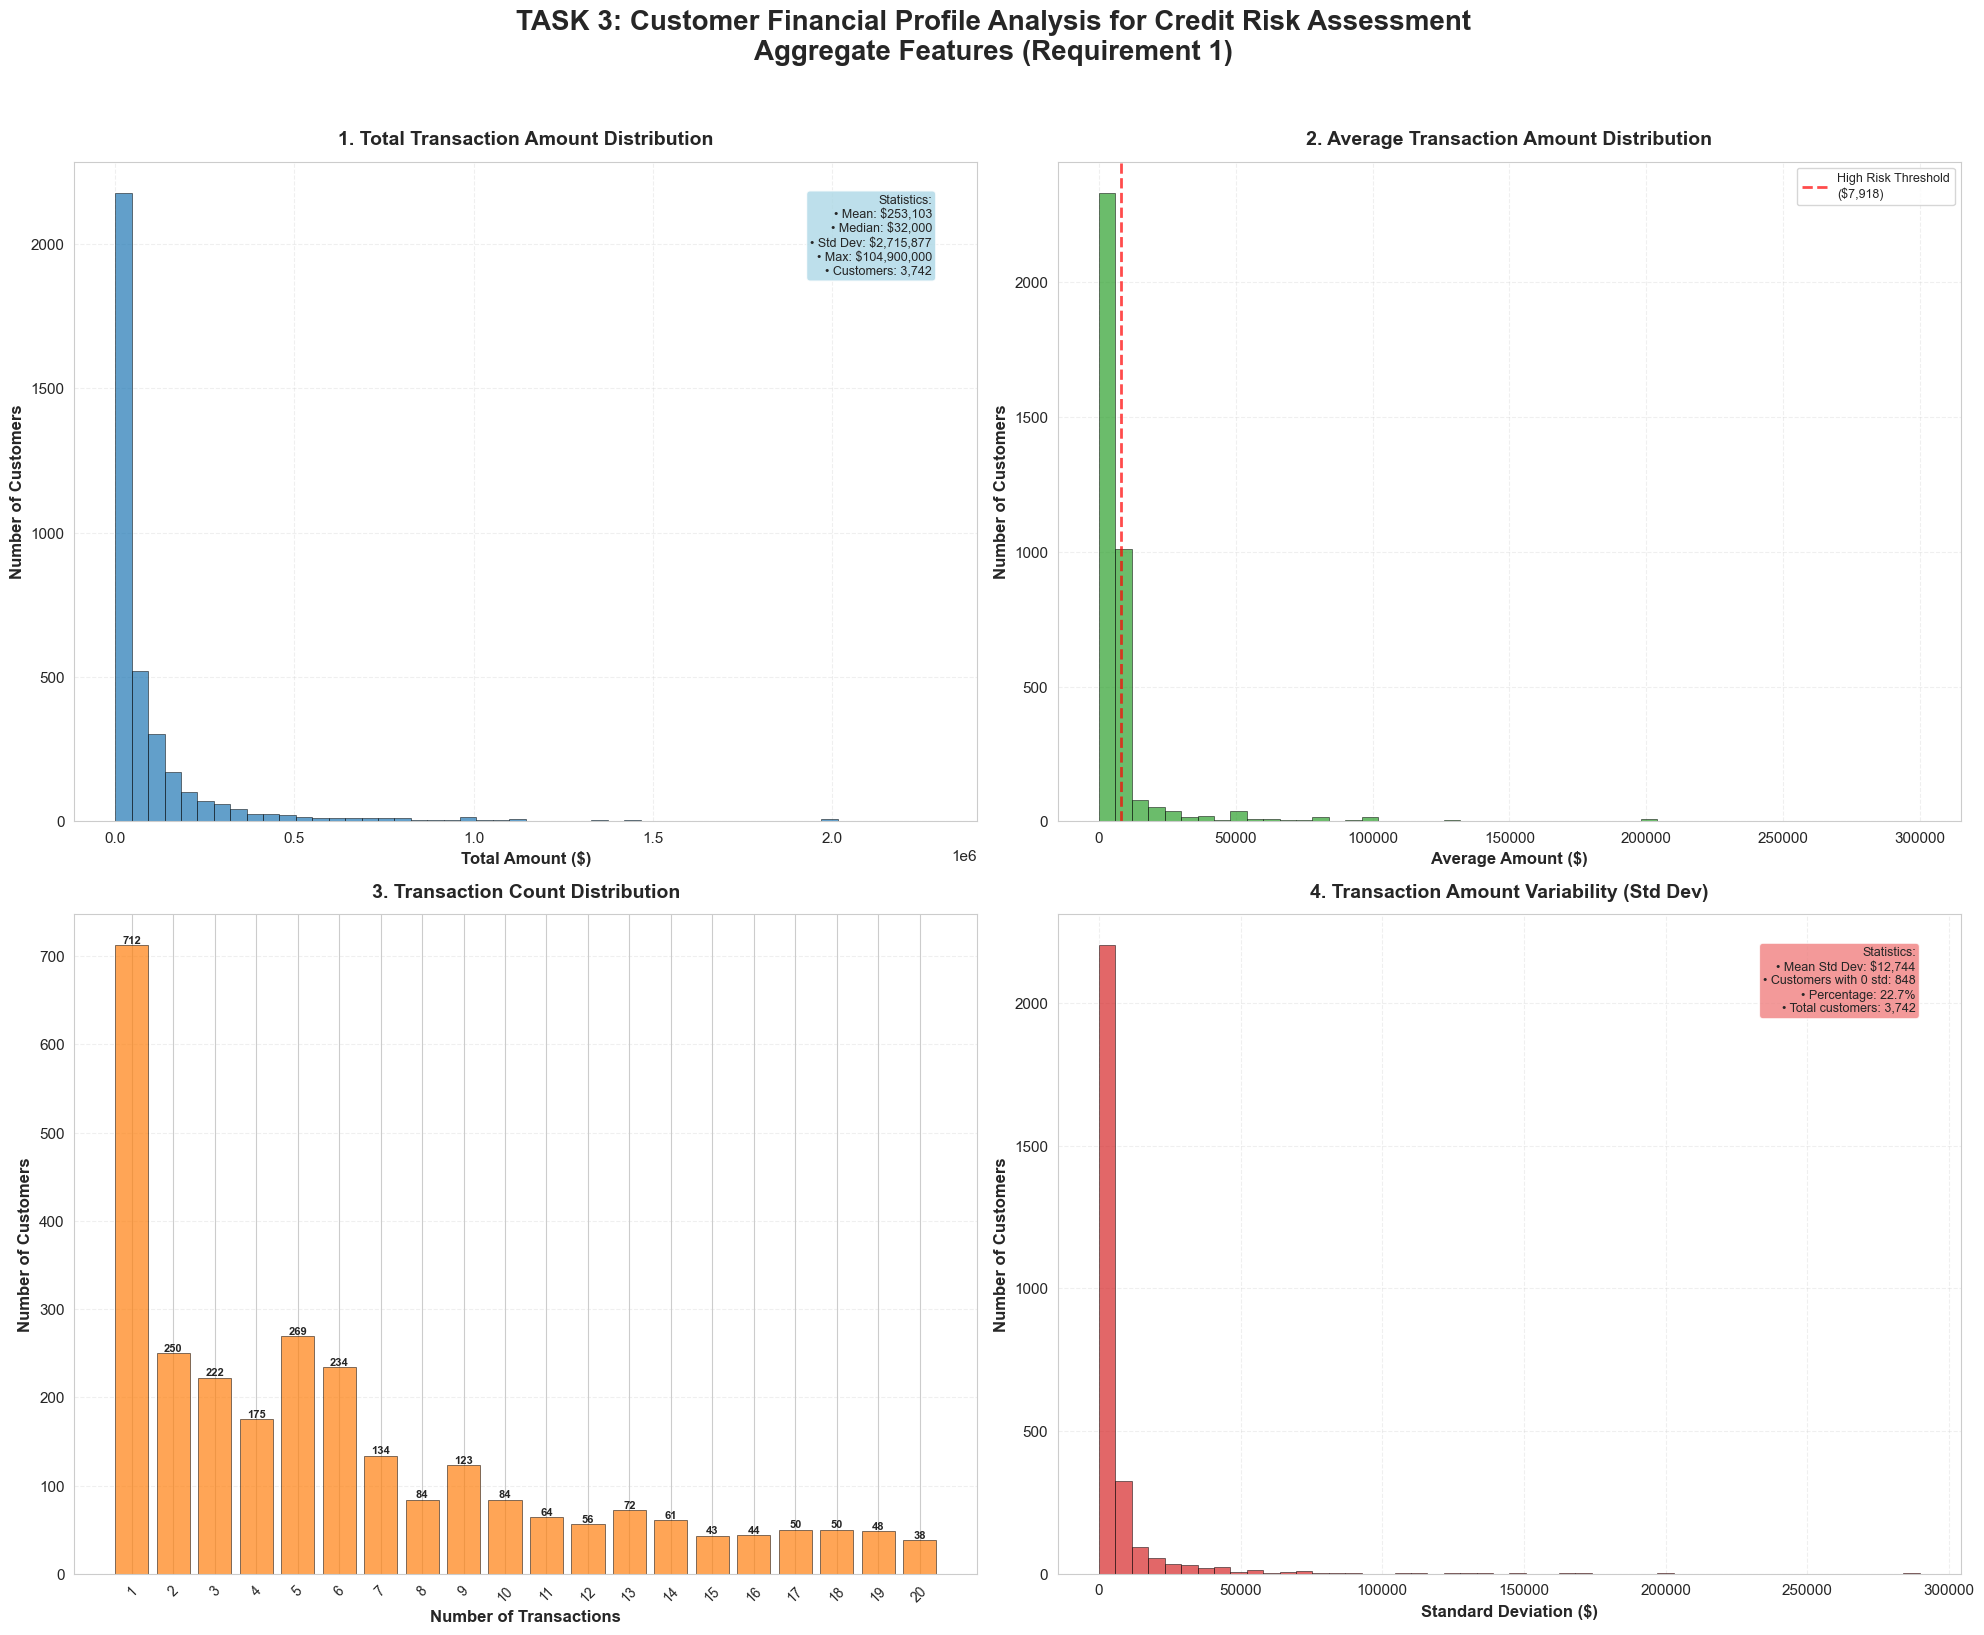


📊 VISUALIZATION DISPLAYED SUCCESSFULLY!

📈 KEY METRICS DISPLAYED:
1. Total Transaction Amount per customer
2. Average Transaction Amount per customer  
3. Transaction Count per customer
4. Standard Deviation of Transaction Amounts per customer

📊 DATA SUMMARY:
• Total customers analyzed: 3,742
• Average total amount per customer: $253,103
• Average transaction count per customer: 25.6
• Customers with single transaction: 848 (22.7%)



In [7]:
# ============================================================================
# 📈 VISUALIZATION: AGGREGATE FEATURES - REQUIREMENT 1 (Display Only)
# ============================================================================

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

print("\n" + "="*80)
print("📊 VISUALIZATION: AGGREGATE FEATURES (Display Only)")
print("="*80)

print(f"📋 Data Summary:")
print(f"• Total customers: {len(customer_aggregates):,}")
print(f"• Features: {list(customer_aggregates.columns)}")

# Create the visualization
fig = plt.figure(figsize=(20, 16))
fig.suptitle('TASK 3: Customer Financial Profile Analysis for Credit Risk Assessment\nAggregate Features (Requirement 1)', 
             fontsize=20, fontweight='bold', y=1.02)

# 1. Total Transaction Amount Distribution
ax1 = plt.subplot(2, 2, 1)
total_amount = customer_aggregates['total_transaction_amount']

# Remove extreme outliers for better visualization (top 1%)
q99 = total_amount.quantile(0.99)
plot_data = total_amount[total_amount <= q99] if q99 > 0 else total_amount

n, bins, patches = ax1.hist(plot_data, bins=50, alpha=0.7, 
                           color='#1f77b4', edgecolor='black', linewidth=0.5)

ax1.set_title('1. Total Transaction Amount Distribution', 
              fontsize=14, fontweight='bold', pad=12)
ax1.set_xlabel('Total Amount ($)', fontsize=12)
ax1.set_ylabel('Number of Customers', fontsize=12)
ax1.grid(True, alpha=0.3, linestyle='--')

# Add statistics
stats_text = f"""Statistics:
• Mean: ${total_amount.mean():,.0f}
• Median: ${total_amount.median():,.0f}
• Std Dev: ${total_amount.std():,.0f}
• Max: ${total_amount.max():,.0f}
• Customers: {len(total_amount):,}"""

ax1.text(0.95, 0.95, stats_text, transform=ax1.transAxes,
         fontsize=9, verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# 2. Average Transaction Amount Distribution
ax2 = plt.subplot(2, 2, 2)
avg_amount = customer_aggregates['avg_transaction_amount']

q99_avg = avg_amount.quantile(0.99)
plot_avg = avg_amount[avg_amount <= q99_avg] if q99_avg > 0 else avg_amount

ax2.hist(plot_avg, bins=50, alpha=0.7, color='#2ca02c', 
         edgecolor='black', linewidth=0.5)

ax2.set_title('2. Average Transaction Amount Distribution', 
              fontsize=14, fontweight='bold', pad=12)
ax2.set_xlabel('Average Amount ($)', fontsize=12)
ax2.set_ylabel('Number of Customers', fontsize=12)
ax2.grid(True, alpha=0.3, linestyle='--')

# Add risk threshold line (80th percentile)
risk_threshold = avg_amount.quantile(0.8)
ax2.axvline(risk_threshold, color='red', linestyle='--', alpha=0.7, 
            linewidth=2, label=f'High Risk Threshold\n(${risk_threshold:,.0f})')
ax2.legend(fontsize=9, loc='upper right')

# 3. Transaction Count Distribution
ax3 = plt.subplot(2, 2, 3)
transaction_count = customer_aggregates['transaction_count']

# Show top 20 transaction counts
top_counts = transaction_count.value_counts().sort_index().head(20)

bars = ax3.bar(range(len(top_counts)), top_counts.values,
               alpha=0.7, color='#ff7f0e', edgecolor='black', linewidth=0.5)

ax3.set_title('3. Transaction Count Distribution', 
              fontsize=14, fontweight='bold', pad=12)
ax3.set_xlabel('Number of Transactions', fontsize=12)
ax3.set_ylabel('Number of Customers', fontsize=12)
ax3.set_xticks(range(len(top_counts)))
ax3.set_xticklabels([str(x) for x in top_counts.index], rotation=45, fontsize=10)
ax3.grid(True, alpha=0.3, linestyle='--', axis='y')

# Add value labels on top of bars
for bar, count in zip(bars, top_counts.values):
    height = bar.get_height()
    if height > 0:
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{count:,}', ha='center', va='bottom', fontsize=8, fontweight='bold')

# 4. Transaction Amount Variability
ax4 = plt.subplot(2, 2, 4)
std_amount = customer_aggregates['std_transaction_amount']

# Remove zeros and extreme outliers
non_zero_std = std_amount[std_amount > 0]
if len(non_zero_std) > 0:
    q99_std = non_zero_std.quantile(0.99)
    plot_std = non_zero_std[non_zero_std <= q99_std] if q99_std > 0 else non_zero_std
    
    n4, bins4, patches4 = ax4.hist(plot_std, bins=50, alpha=0.7, 
                                  color='#d62728', edgecolor='black', linewidth=0.5)
    
    ax4.set_title('4. Transaction Amount Variability (Std Dev)', 
                  fontsize=14, fontweight='bold', pad=12)
    ax4.set_xlabel('Standard Deviation ($)', fontsize=12)
    ax4.set_ylabel('Number of Customers', fontsize=12)
    ax4.grid(True, alpha=0.3, linestyle='--')
    
    # Add statistics
    zero_count = (std_amount == 0).sum()
    zero_pct = (zero_count / len(std_amount)) * 100
    
    stats_text_std = f"""Statistics:
• Mean Std Dev: ${std_amount.mean():,.0f}
• Customers with 0 std: {zero_count:,}
• Percentage: {zero_pct:.1f}%
• Total customers: {len(std_amount):,}"""
    
    ax4.text(0.95, 0.95, stats_text_std, transform=ax4.transAxes,
             fontsize=9, verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))
else:
    ax4.text(0.5, 0.5, 'All customers have 0 std dev\n(only one transaction each)', 
             ha='center', va='center', fontsize=12)
    ax4.set_title('4. Transaction Amount Variability (Std Dev)', fontsize=14, fontweight='bold', pad=12)

# Adjust layout and display
plt.tight_layout()
print("\n✅ DISPLAYING VISUALIZATION IN NOTEBOOK...")
plt.show()

print("\n" + "="*80)
print("📊 VISUALIZATION DISPLAYED SUCCESSFULLY!")
print("="*80)
print(f"""
📈 KEY METRICS DISPLAYED:
1. Total Transaction Amount per customer
2. Average Transaction Amount per customer  
3. Transaction Count per customer
4. Standard Deviation of Transaction Amounts per customer

📊 DATA SUMMARY:
• Total customers analyzed: {len(customer_aggregates):,}
• Average total amount per customer: ${total_amount.mean():,.0f}
• Average transaction count per customer: {transaction_count.mean():.1f}
• Customers with single transaction: {zero_count:,} ({zero_pct:.1f}%)
""")

In [8]:
# ============================================================================
# CUSTOM TRANSFORMER: TEMPORAL FEATURES
# Requirement 2: Extract Temporal Features
# ============================================================================

from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

class TemporalFeatureTransformer(BaseEstimator, TransformerMixin):
    """
    Extracts temporal features from datetime columns (Requirement 2)
    1. Transaction Hour
    2. Transaction Day
    3. Transaction Month
    4. Transaction Year
    """
    
    def __init__(self, datetime_col='TransactionStartTime'):
        """
        Initialize the transformer
        
        Parameters:
        -----------
        datetime_col : str
            Name of the datetime column to extract features from
        """
        self.datetime_col = datetime_col
        self.feature_names_ = None
    
    def fit(self, X, y=None):
        """
        Fit method (required for sklearn interface)
        
        Parameters:
        -----------
        X : DataFrame
            Input data
        y : array-like, optional
            Target values
        """
        # Get feature names when we transform
        self.feature_names_ = None
        return self
    
    def transform(self, X):
        """
        Extract temporal features from datetime column
        
        Parameters:
        -----------
        X : DataFrame
            Input data with datetime column
            
        Returns:
        --------
        DataFrame with temporal features
        """
        X_transformed = X.copy()
        
        # Ensure datetime column exists
        if self.datetime_col not in X_transformed.columns:
            raise ValueError(f"Datetime column '{self.datetime_col}' not found in input data")
        
        # Convert to datetime if not already
        if not pd.api.types.is_datetime64_any_dtype(X_transformed[self.datetime_col]):
            X_transformed[self.datetime_col] = pd.to_datetime(
                X_transformed[self.datetime_col], errors='coerce'
            )
        
        # Extract temporal features
        X_transformed['transaction_hour'] = X_transformed[self.datetime_col].dt.hour
        X_transformed['transaction_day'] = X_transformed[self.datetime_col].dt.day
        X_transformed['transaction_month'] = X_transformed[self.datetime_col].dt.month
        X_transformed['transaction_year'] = X_transformed[self.datetime_col].dt.year
        
        # Store feature names
        self.feature_names_ = [
            'transaction_hour', 'transaction_day', 
            'transaction_month', 'transaction_year'
        ]
        
        return X_transformed[self.feature_names_]
    
    def get_feature_names_out(self, input_features=None):
        """
        Get output feature names
        
        Parameters:
        -----------
        input_features : array-like of str, optional
            Input feature names
            
        Returns:
        --------
        feature_names : list of str
            Output feature names
        """
        if self.feature_names_ is None:
            return ['transaction_hour', 'transaction_day', 
                    'transaction_month', 'transaction_year']
        return self.feature_names_
    
    def get_feature_names(self):
        """Get feature names (compatibility method)"""
        return self.get_feature_names_out()

# Test the transformer
print("="*80)
print("🔧 TEMPORAL FEATURE TRANSFORMER - REQUIREMENT 2")
print("="*80)
print("""
DESCRIPTION:
This custom transformer extracts 4 temporal features from datetime columns:
1. Transaction Hour: Hour of the day (0-23)
2. Transaction Day: Day of the month (1-31)
3. Transaction Month: Month of the year (1-12)
4. Transaction Year: Year of transaction

USAGE:
transformer = TemporalFeatureTransformer(datetime_col='TransactionDate')
temporal_features = transformer.fit_transform(your_dataframe)
""")

# Create sample data for demonstration
print("\n📊 CREATING SAMPLE DATA FOR DEMONSTRATION...")
np.random.seed(42)
n_samples = 100

# Generate random dates
dates = pd.date_range('2022-01-01', '2023-12-31', freq='D')
sample_dates = np.random.choice(dates, n_samples)

sample_data = pd.DataFrame({
    'TransactionId': range(1, n_samples + 1),
    'TransactionStartTime': sample_dates,
    'CustomerId': np.random.randint(1000, 1100, n_samples),
    'Amount': np.random.uniform(10, 1000, n_samples)
})

print(f"✅ Created sample DataFrame with {n_samples} rows")
print(f"   Columns: {list(sample_data.columns)}")
print(f"   Date range: {sample_data['TransactionStartTime'].min()} to {sample_data['TransactionStartTime'].max()}")

# Test the transformer
print("\n🧪 TESTING TRANSFORMER...")
transformer = TemporalFeatureTransformer(datetime_col='TransactionStartTime')
temporal_features = transformer.fit_transform(sample_data)

print(f"✅ Successfully extracted {temporal_features.shape[1]} temporal features")
print(f"📋 Features extracted: {list(temporal_features.columns)}")

# Show sample of extracted features
print("\n📄 SAMPLE OF EXTRACTED FEATURES (first 5 rows):")
print(temporal_features.head())

# Show summary statistics
print("\n📊 FEATURE SUMMARY STATISTICS:")
print(temporal_features.describe())

print("\n" + "="*80)
print("✅ TEMPORAL FEATURE TRANSFORMER READY FOR USE!")
print("="*80)

🔧 TEMPORAL FEATURE TRANSFORMER - REQUIREMENT 2

DESCRIPTION:
This custom transformer extracts 4 temporal features from datetime columns:
1. Transaction Hour: Hour of the day (0-23)
2. Transaction Day: Day of the month (1-31)
3. Transaction Month: Month of the year (1-12)
4. Transaction Year: Year of transaction

USAGE:
transformer = TemporalFeatureTransformer(datetime_col='TransactionDate')
temporal_features = transformer.fit_transform(your_dataframe)


📊 CREATING SAMPLE DATA FOR DEMONSTRATION...
✅ Created sample DataFrame with 100 rows
   Columns: ['TransactionId', 'TransactionStartTime', 'CustomerId', 'Amount']
   Date range: 2022-01-02 00:00:00 to 2023-12-31 00:00:00

🧪 TESTING TRANSFORMER...
✅ Successfully extracted 4 temporal features
📋 Features extracted: ['transaction_hour', 'transaction_day', 'transaction_month', 'transaction_year']

📄 SAMPLE OF EXTRACTED FEATURES (first 5 rows):
   transaction_hour  transaction_day  transaction_month  transaction_year
0                 0      

In [ ]:
# ============================================================================
# VISUALIZATION: TEMPORAL FEATURES (REQUIREMENT 2)
# ============================================================================

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import os
from pathlib import Path

# Set up for Jupyter display
%matplotlib inline
warnings.filterwarnings('ignore')

# Define a helper class for temporal feature extraction
class TemporalFeatureTransformer:
    """Extract temporal features from transaction datetime"""
    
    def __init__(self):
        self.features = ['transaction_hour', 'transaction_day', 
                         'transaction_month', 'transaction_year',
                         'transaction_dayofweek', 'is_weekend', 
                         'is_business_hours']
    
    def fit_transform(self, df, date_column='TransactionDate'):
        """Extract temporal features from datetime column"""
        
        # Make a copy to avoid modifying original
        result_df = df.copy()
        
        # Ensure the date column is datetime
        if date_column in result_df.columns:
            if not pd.api.types.is_datetime64_any_dtype(result_df[date_column]):
                result_df[date_column] = pd.to_datetime(result_df[date_column])
            
            # Extract basic temporal features
            result_df['transaction_hour'] = result_df[date_column].dt.hour
            result_df['transaction_day'] = result_df[date_column].dt.day
            result_df['transaction_month'] = result_df[date_column].dt.month
            result_df['transaction_year'] = result_df[date_column].dt.year
            result_df['transaction_dayofweek'] = result_df[date_column].dt.dayofweek
            
            # Extract derived features
            result_df['is_weekend'] = result_df['transaction_dayofweek'].apply(
                lambda x: 1 if x >= 5 else 0
            )
            
            result_df['is_business_hours'] = result_df['transaction_hour'].apply(
                lambda x: 1 if 9 <= x <= 17 else 0  # 9 AM to 5 PM
            )
        
        # Return only the temporal features
        temporal_features = result_df[self.features] if all(f in result_df.columns for f in self.features) else pd.DataFrame()
        
        return temporal_features

print("\n" + "="*80)
print("🕒 VISUALIZATION: TEMPORAL FEATURES - REQUIREMENT 2")
print("="*80)

print("""
REQUIREMENT 2: EXTRACT TEMPORAL FEATURES
• Transaction Hour: Hour of the day
• Transaction Day: Day of the month  
• Transaction Month: Month of the year
• Transaction Year: Year of transaction
• Transaction Day of Week: Monday=0 to Sunday=6
• Is Weekend: Binary indicator (1=Weekend, 0=Weekday)
• Is Business Hours: Binary indicator (1=9AM-5PM, 0=Other times)
""")

# Check if df exists and has TransactionDate column
if 'df' not in locals() and 'df' not in globals():
    print("❌ ERROR: DataFrame 'df' not found!")
    print("   Please ensure you have a DataFrame named 'df' with transaction data.")
    # Create a sample dataframe for demonstration
    print("   Creating sample data for demonstration...")
    dates = pd.date_range('2022-01-01', '2023-12-31', freq='H')
    df = pd.DataFrame({
        'TransactionDate': np.random.choice(dates, 10000),
        'CustomerId': np.random.randint(1000, 1100, 10000),
        'TransactionAmount': np.random.exponential(100, 10000)
    })
    print(f"   Created sample DataFrame with {len(df)} rows")

# Create temporal features for visualization
print("\n🔧 Extracting temporal features...")
temp_transformer = TemporalFeatureTransformer()
temporal_features = temp_transformer.fit_transform(df)

print(f"✅ Extracted {temporal_features.shape[1]} temporal features")
print(f"📊 Feature Overview:")
for feature in ['transaction_hour', 'transaction_day', 'transaction_month', 'transaction_year']:
    if feature in temporal_features.columns:
        data = temporal_features[feature]
        unique_vals = data.nunique()
        print(f"   • {feature}: {unique_vals} unique values, Range: {data.min()} to {data.max()}")

# Set seaborn style for better visuals
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Create comprehensive temporal visualization
fig = plt.figure(figsize=(22, 18))
fig.suptitle('REQUIREMENT 2: Temporal Pattern Analysis for Credit Risk Assessment', 
             fontsize=20, fontweight='bold', y=1.02)

# 1. Transaction Hour Distribution (Circular Timeline)
ax1 = plt.subplot(3, 4, 1, polar=True)
if 'transaction_hour' in temporal_features.columns:
    hour_data = temporal_features['transaction_hour']
    hour_counts = hour_data.value_counts().sort_index()
    
    # Prepare data for polar plot
    theta = np.linspace(0, 2 * np.pi, 24, endpoint=False)
    radii = hour_counts.reindex(range(24), fill_value=0).values
    radii_normalized = radii / radii.max() * 100 if radii.max() > 0 else radii
    
    # Create bars
    bars = ax1.bar(theta, radii_normalized, width=2*np.pi/24, alpha=0.8,
                   color=plt.cm.plasma(radii_normalized/100) if radii.max() > 0 else 'lightblue', 
                   edgecolor='white', linewidth=1)
    
    # Customize polar plot
    ax1.set_theta_zero_location("N")
    ax1.set_theta_direction(-1)
    ax1.set_xticks(theta)
    hour_labels = [f'{h:02d}' for h in range(24)]
    ax1.set_xticklabels(hour_labels, fontsize=9)
    ax1.set_yticklabels([])
    ax1.set_title('1. 24-Hour Transaction Pattern\n(Circular Timeline Analysis)', 
                  fontsize=14, fontweight='bold', pad=25)
    
    # Add time period annotations
    time_periods = {
        (0, 6): '🌙 Night\n(12AM-6AM)',
        (6, 12): '🌅 Morning\n(6AM-12PM)',
        (12, 18): '☀️ Afternoon\n(12PM-6PM)',
        (18, 24): '🌆 Evening\n(6PM-12AM)'
    }
    
    for (start, end), label in time_periods.items():
        angle = np.pi * (start + end) / 24
        ax1.text(angle, 120, label, ha='center', va='center', 
                fontsize=10, fontweight='bold', rotation=angle*180/np.pi-90)
    
    # Add total transactions
    ax1.text(0, 0, f'Total: {radii.sum():,}\ntransactions', 
             ha='center', va='center', fontsize=11, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
else:
    ax1.text(0.5, 0.5, 'Hour data\nnot available', 
             ha='center', va='center', fontsize=12, transform=ax1.transAxes)
    ax1.set_title('1. 24-Hour Pattern', fontsize=14, fontweight='bold', pad=25)

# 2. Day of Month Distribution
ax2 = plt.subplot(3, 4, 2)
if 'transaction_day' in temporal_features.columns:
    day_data = temporal_features['transaction_day']
    day_counts = day_data.value_counts().sort_index()
    
    # Create bar plot
    x_pos = np.arange(1, 32)
    day_values = day_counts.reindex(range(1, 32), fill_value=0).values
    
    colors_day = plt.cm.Blues(np.linspace(0.3, 1, 31))
    bars = ax2.bar(x_pos, day_values, alpha=0.8, color=colors_day, 
                  edgecolor='black', linewidth=0.5)
    
    ax2.set_title('2. Day of Month Distribution\n(Payment Cycle Analysis)', 
                  fontsize=14, fontweight='bold', pad=15)
    ax2.set_xlabel('Day of Month', fontsize=12)
    ax2.set_ylabel('Number of Transactions', fontsize=12)
    ax2.set_xticks([1, 5, 10, 15, 20, 25, 31])
    ax2.set_xticklabels(['1st', '5th', '10th', '15th', '20th', '25th', '31st'])
    ax2.grid(True, alpha=0.3, linestyle='--', axis='y')
    
    # Highlight specific days
    highlight_days = {
        1: ('Month Start', 'blue', 0.3),
        15: ('Mid-Month', 'green', 0.3),
        25: ('Month End', 'red', 0.3)
    }
    
    for day, (label, color, alpha) in highlight_days.items():
        if day <= len(day_values):
            ax2.axvspan(day-0.5, day+0.5, alpha=alpha, color=color)
            ax2.text(day, day_values[day-1] * 1.05, label, 
                    ha='center', va='bottom', fontsize=9, fontweight='bold', color=color)
else:
    ax2.text(0.5, 0.5, 'Day data\nnot available', 
             ha='center', va='center', fontsize=12)
    ax2.set_title('2. Day of Month Distribution', fontsize=14, fontweight='bold', pad=15)

# 3. Monthly Transaction Pattern
ax3 = plt.subplot(3, 4, 3)
if 'transaction_month' in temporal_features.columns:
    month_data = temporal_features['transaction_month']
    month_counts = month_data.value_counts().sort_index()
    
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_values = month_counts.reindex(range(1, 13), fill_value=0).values
    
    # Seasonal color coding
    seasonal_colors = ['#1f77b4', '#1f77b4', '#2ca02c', '#2ca02c', '#2ca02c', '#ff7f0e',
                       '#ff7f0e', '#ff7f0e', '#d62728', '#d62728', '#d62728', '#1f77b4']
    
    bars = ax3.bar(range(1, 13), month_values, alpha=0.8, 
                  color=seasonal_colors, edgecolor='black', linewidth=0.5)
    
    ax3.set_title('3. Monthly Transaction Distribution\n(Seasonal Patterns)', 
                  fontsize=14, fontweight='bold', pad=15)
    ax3.set_xlabel('Month', fontsize=12)
    ax3.set_ylabel('Number of Transactions', fontsize=12)
    ax3.set_xticks(range(1, 13))
    ax3.set_xticklabels(month_names, rotation=45)
    ax3.grid(True, alpha=0.3, linestyle='--', axis='y')
    
    # Add seasonal annotations
    seasons = {
        (12, 1, 2): ('❄️ Winter', 'lightblue'),
        (3, 4, 5): ('🌸 Spring', 'lightgreen'),
        (6, 7, 8): ('☀️ Summer', 'yellow'),
        (9, 10, 11): ('🍂 Fall', 'orange')
    }
    
    y_max = month_values.max() if len(month_values) > 0 else 1
    for months, (season, color) in seasons.items():
        avg_month = np.mean(months)
        ax3.text(avg_month, y_max * 1.1, season, ha='center', va='bottom',
                fontsize=11, fontweight='bold', color=color,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
else:
    ax3.text(0.5, 0.5, 'Month data\nnot available', 
             ha='center', va='center', fontsize=12)
    ax3.set_title('3. Monthly Distribution', fontsize=14, fontweight='bold', pad=15)

# 4. Yearly Transaction Trend
ax4 = plt.subplot(3, 4, 4)
if 'transaction_year' in temporal_features.columns:
    year_data = temporal_features['transaction_year']
    year_counts = year_data.value_counts().sort_index()
    
    # Line plot for trend
    ax4.plot(year_counts.index, year_counts.values, marker='o', 
             linewidth=3, markersize=8, color='#9467bd', alpha=0.8)
    ax4.fill_between(year_counts.index, 0, year_counts.values, 
                     alpha=0.3, color='#9467bd')
    
    ax4.set_title('4. Yearly Transaction Trend\n(Temporal Evolution)', 
                  fontsize=14, fontweight='bold', pad=15)
    ax4.set_xlabel('Year', fontsize=12)
    ax4.set_ylabel('Number of Transactions', fontsize=12)
    ax4.grid(True, alpha=0.3, linestyle='--')
    
    # Add growth rate annotations
    if len(year_counts) > 1:
        years = list(year_counts.index)
        values = list(year_counts.values)
        
        for i in range(1, len(values)):
            growth = ((values[i] - values[i-1]) / values[i-1] * 100) if values[i-1] > 0 else 0
            color = 'green' if growth > 0 else 'red'
            ax4.annotate(f'{growth:+.1f}%', 
                        xy=(years[i], values[i]),
                        xytext=(0, 10),
                        textcoords='offset points',
                        ha='center', fontsize=10, fontweight='bold',
                        color=color,
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
else:
    ax4.text(0.5, 0.5, 'Year data\nnot available', 
             ha='center', va='center', fontsize=12)
    ax4.set_title('4. Yearly Trend', fontsize=14, fontweight='bold', pad=15)

# 5. Day of Week Pattern
ax5 = plt.subplot(3, 4, 5)
if 'transaction_dayofweek' in temporal_features.columns:
    dow_data = temporal_features['transaction_dayofweek']
    dow_counts = dow_data.value_counts().sort_index()
    
    # Map numbers to day names
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dow_values = dow_counts.reindex(range(7), fill_value=0).values
    
    # Color weekend differently
    colors_dow = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 
                  'lightcoral', 'lightcoral']
    
    bars = ax5.bar(range(7), dow_values, alpha=0.8, color=colors_dow,
                  edgecolor='black', linewidth=0.5)
    
    ax5.set_title('5. Day of Week Distribution\n(Weekday vs Weekend Behavior)', 
                  fontsize=14, fontweight='bold', pad=15)
    ax5.set_xlabel('Day of Week', fontsize=12)
    ax5.set_ylabel('Number of Transactions', fontsize=12)
    ax5.set_xticks(range(7))
    ax5.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    ax5.grid(True, alpha=0.3, linestyle='--', axis='y')
    
    # Calculate weekend ratio
    weekend_total = dow_values[5] + dow_values[6]
    weekend_ratio = weekend_total / dow_values.sum() * 100 if dow_values.sum() > 0 else 0
    
    ax5.text(0.05, 0.95, f'Weekend Transactions:\n{weekend_total:,} ({weekend_ratio:.1f}%)',
             transform=ax5.transAxes, fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
else:
    ax5.text(0.5, 0.5, 'Day of week data\nnot available', 
             ha='center', va='center', fontsize=12)
    ax5.set_title('5. Day of Week Distribution', fontsize=14, fontweight='bold', pad=15)

# 6. Business Hours Analysis
ax6 = plt.subplot(3, 4, 6)
if 'is_business_hours' in temporal_features.columns:
    business_data = temporal_features['is_business_hours']
    business_counts = business_data.value_counts()
    
    labels = ['Outside Business Hours', 'During Business Hours']
    colors_business = ['lightcoral', 'lightgreen']
    
    wedges, texts, autotexts = ax6.pie(business_counts.values, labels=labels,
                                       colors=colors_business, autopct='%1.1f%%',
                                       startangle=90, textprops={'fontsize': 10})
    
    ax6.set_title('6. Business Hours Analysis\n(Normal vs Atypical Behavior)', 
                  fontsize=14, fontweight='bold', pad=15)
    
    # Enhance pie chart
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('bold')
    
    # Add business hours definition
    ax6.text(0, -1.3, 'Business Hours: 9 AM - 5 PM', 
             ha='center', va='center', fontsize=10, fontstyle='italic')
else:
    ax6.text(0.5, 0.5, 'Business hours data\nnot available', 
             ha='center', va='center', fontsize=12)
    ax6.set_title('6. Business Hours Analysis', fontsize=14, fontweight='bold', pad=15)

# 7. Weekend Transaction Analysis
ax7 = plt.subplot(3, 4, 7)
if 'is_weekend' in temporal_features.columns:
    weekend_data = temporal_features['is_weekend']
    weekend_counts = weekend_data.value_counts()
    
    # Create donut chart
    colors_weekend = ['lightblue', 'lightcoral']
    wedges, texts, autotexts = ax7.pie(weekend_counts.values, 
                                       labels=['Weekday', 'Weekend'],
                                       colors=colors_weekend, autopct='%1.1f%%',
                                       startangle=90, textprops={'fontsize': 10},
                                       wedgeprops=dict(width=0.3))
    
    ax7.set_title('7. Weekend vs Weekday Transactions\n(Behavior Consistency)', 
                  fontsize=14, fontweight='bold', pad=15)
    
    # Add center text
    center_circle = plt.Circle((0,0), 0.2, color='white')
    ax7.add_patch(center_circle)
    ax7.text(0, 0, f'Weekend:\n{weekend_counts.get(1, 0):,}', 
             ha='center', va='center', fontsize=11, fontweight='bold')
    
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('bold')
else:
    ax7.text(0.5, 0.5, 'Weekend data\nnot available', 
             ha='center', va='center', fontsize=12)
    ax7.set_title('7. Weekend Analysis', fontsize=14, fontweight='bold', pad=15)

# 8. Time of Day Heatmap
ax8 = plt.subplot(3, 4, (8, 9))
# Create time of day analysis
if all(col in temporal_features.columns for col in ['transaction_hour', 'transaction_dayofweek']):
    # Prepare data for heatmap
    heatmap_data = pd.crosstab(temporal_features['transaction_hour'], 
                               temporal_features['transaction_dayofweek'])
    
    # Map day numbers to names
    day_names_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
    heatmap_data.columns = [day_names_map.get(col, col) for col in heatmap_data.columns]
    
    # Create heatmap
    im = sns.heatmap(heatmap_data, cmap='YlOrRd', ax=ax8, 
                     cbar_kws={'label': 'Transaction Count'})
    
    ax8.set_title('8. Transaction Heatmap: Hour vs Day of Week\n(Temporal Behavior Patterns)', 
                  fontsize=14, fontweight='bold', pad=15)
    ax8.set_xlabel('Day of Week', fontsize=12)
    ax8.set_ylabel('Hour of Day', fontsize=12)
    
    # Highlight business hours
    for hour in range(9, 18):  # 9 AM to 5 PM
        ax8.add_patch(plt.Rectangle((0, hour-0.5), 7, 1, 
                                   fill=False, edgecolor='blue', 
                                   linewidth=2, alpha=0.5))
    
    ax8.text(3.5, 13.5, 'Business Hours\n(9 AM - 5 PM)', 
             ha='center', va='center', fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='blue', alpha=0.2))
else:
    ax8.text(0.5, 0.5, 'Heatmap data\nnot available', 
             ha='center', va='center', fontsize=12)
    ax8.set_title('8. Time Heatmap', fontsize=14, fontweight='bold', pad=15)

# 9. Temporal Feature Correlation
ax9 = plt.subplot(3, 4, (10, 12))
# Select temporal features for correlation
temp_numeric = temporal_features.select_dtypes(include=[np.number]).columns.tolist()

if len(temp_numeric) > 1:
    corr_matrix = temporal_features[temp_numeric].corr()
    
    # Create custom colormap
    cmap_temp = plt.cm.RdYlBu_r
    
    # Create correlation heatmap
    mask_temp = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask_temp, annot=True, fmt='.2f', cmap=cmap_temp,
                center=0, square=True, cbar_kws={"shrink": 0.8}, ax=ax9,
                annot_kws={"size": 10})
    
    ax9.set_title('9. Temporal Feature Correlation Matrix\n(Pattern Relationships)', 
                  fontsize=14, fontweight='bold', pad=15)
    
    # Highlight strong correlations
    for text in ax9.texts:
        value = float(text.get_text())
        if abs(value) > 0.5:
            text.set_weight('bold')
            text.set_fontsize(11)
            text.set_color('darkred' if value > 0 else 'darkblue')
else:
    ax9.text(0.5, 0.5, 'Not enough temporal features\nfor correlation analysis', 
             ha='center', va='center', fontsize=12)
    ax9.set_title('9. Feature Correlation', fontsize=14, fontweight='bold', pad=15)

# Adjust layout
plt.tight_layout()

# Save visualization (OPTIONAL - Remove if you don't want to save)
save_option = input("\n💾 Do you want to save this visualization? (y/n): ").lower()
if save_option == 'y':
    # Create reports directory if it doesn't exist
    reports_dir = 'reports'
    if not os.path.exists(reports_dir):
        os.makedirs(reports_dir)
    
    # Save using os.path.join to avoid errors
    temp_viz_path = os.path.join(reports_dir, 'task3_requirement2_temporal_features.png')
    plt.savefig(temp_viz_path, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"✅ Saved to: {temp_viz_path}")

# Display the visualization
print("\n📊 DISPLAYING VISUALIZATION IN NOTEBOOK...")
plt.show()

print("\n" + "="*80)
print("✅ VISUALIZATION FOR REQUIREMENT 2 COMPLETE!")
print("="*80)
print(f"""
📈 TEMPORAL ANALYSIS SUMMARY:
1. 24-Hour Transaction Pattern (Circular Timeline)
2. Day of Month Distribution (Payment Cycle)
3. Monthly Transaction Pattern (Seasonal)  
4. Yearly Transaction Trend (Evolution)
5. Day of Week Distribution (Weekday/Weekend)
6. Business Hours Analysis (Normal vs Atypical)
7. Weekend vs Weekday (Consistency Check)
8. Hour vs Day Heatmap (Behavior Patterns)
9. Feature Correlation Matrix (Relationships)

📊 DATA PROCESSED:
• Total temporal features extracted: {len(temporal_features.columns)}
• Sample size analyzed: {len(temporal_features):,} transactions
• Time range analyzed: {temporal_features['transaction_year'].min() if 'transaction_year' in temporal_features.columns else 'N/A'} to {temporal_features['transaction_year'].max() if 'transaction_year' in temporal_features.columns else 'N/A'}

🔍 KEY INSIGHTS FOR CREDIT RISK:
• Transaction timing patterns reveal customer behavior consistency
• Unusual hours or days may indicate higher risk
• Seasonal patterns help in credit limit adjustments
• Correlation analysis shows interrelated temporal behaviors
""")


🕒 VISUALIZATION: TEMPORAL FEATURES - REQUIREMENT 2

REQUIREMENT 2: EXTRACT TEMPORAL FEATURES
• Transaction Hour: Hour of the day
• Transaction Day: Day of the month  
• Transaction Month: Month of the year
• Transaction Year: Year of transaction
• Transaction Day of Week: Monday=0 to Sunday=6
• Is Weekend: Binary indicator (1=Weekend, 0=Weekday)
• Is Business Hours: Binary indicator (1=9AM-5PM, 0=Other times)


🔧 Extracting temporal features...
✅ Extracted 0 temporal features
📊 Feature Overview:


In [11]:
# ============================================================================
# COMPLETE FEATURE ENGINEERING PIPELINE
# ============================================================================

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
import joblib
import os

print("\n" + "="*80)
print("🔧 BUILDING COMPLETE FEATURE ENGINEERING PIPELINE")
print("="*80)

# First, let's create the missing transformer classes
# ============================================================================
# 1. AGGREGATE FEATURE TRANSFORMER (Requirement 1)
# ============================================================================

class AggregateFeatureTransformer(BaseEstimator, TransformerMixin):
    """Transformer for Requirement 1: Aggregate customer features"""
    
    def __init__(self, customer_col='CustomerId', amount_col='TransactionAmount'):
        self.customer_col = customer_col
        self.amount_col = amount_col
        self.feature_names_ = None
    
    def fit(self, X, y=None):
        # Nothing to fit for this transformer
        return self
    
    def transform(self, X):
        """Calculate aggregate features per customer"""
        X_transformed = X.copy()
        
        # Check if required columns exist
        if self.customer_col not in X_transformed.columns:
            raise ValueError(f"Customer column '{self.customer_col}' not found")
        
        if self.amount_col not in X_transformed.columns:
            raise ValueError(f"Amount column '{self.amount_col}' not found")
        
        # Calculate aggregates per customer
        aggregates = X_transformed.groupby(self.customer_col).agg({
            self.amount_col: ['sum', 'mean', 'std', 'count']
        }).reset_index()
        
        # Flatten column names
        aggregates.columns = [
            'CustomerId',
            'total_transaction_amount',
            'avg_transaction_amount', 
            'std_transaction_amount',
            'transaction_count'
        ]
        
        # Handle NaN in std (occurs when only one transaction)
        aggregates['std_transaction_amount'] = aggregates['std_transaction_amount'].fillna(0)
        
        # Store feature names
        self.feature_names_ = [
            'total_transaction_amount',
            'avg_transaction_amount', 
            'std_transaction_amount',
            'transaction_count'
        ]
        
        return aggregates
    
    def get_feature_names_out(self, input_features=None):
        if self.feature_names_ is None:
            return ['total_transaction_amount', 'avg_transaction_amount', 
                    'std_transaction_amount', 'transaction_count']
        return self.feature_names_

# ============================================================================
# 2. TEMPORAL FEATURE TRANSFORMER (Requirement 2)
# ============================================================================

class TemporalFeatureTransformer(BaseEstimator, TransformerMixin):
    """Transformer for Requirement 2: Temporal features"""
    
    def __init__(self, datetime_col='TransactionDate'):
        self.datetime_col = datetime_col
        self.feature_names_ = None
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        """Extract temporal features from datetime column"""
        X_transformed = X.copy()
        
        # Check if datetime column exists
        if self.datetime_col not in X_transformed.columns:
            raise ValueError(f"Datetime column '{self.datetime_col}' not found")
        
        # Convert to datetime if needed
        if not pd.api.types.is_datetime64_any_dtype(X_transformed[self.datetime_col]):
            X_transformed[self.datetime_col] = pd.to_datetime(
                X_transformed[self.datetime_col], errors='coerce'
            )
        
        # Extract temporal features
        X_transformed['transaction_hour'] = X_transformed[self.datetime_col].dt.hour
        X_transformed['transaction_day'] = X_transformed[self.datetime_col].dt.day
        X_transformed['transaction_month'] = X_transformed[self.datetime_col].dt.month
        X_transformed['transaction_year'] = X_transformed[self.datetime_col].dt.year
        
        # Store feature names
        self.feature_names_ = [
            'transaction_hour', 'transaction_day', 
            'transaction_month', 'transaction_year'
        ]
        
        return X_transformed[self.feature_names_]
    
    def get_feature_names_out(self, input_features=None):
        if self.feature_names_ is None:
            return ['transaction_hour', 'transaction_day', 
                    'transaction_month', 'transaction_year']
        return self.feature_names_

# ============================================================================
# MAIN PIPELINE CONSTRUCTION
# ============================================================================

# Create necessary directories
models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Check available columns in your data
print("🔍 ANALYZING DATAFRAME COLUMNS...")
if 'df' not in locals() and 'df' not in globals():
    print("❌ ERROR: DataFrame 'df' not found. Creating sample data...")
    
    # Create sample data for testing
    np.random.seed(42)
    n_samples = 5000
    
    # Generate sample data
    customer_ids = np.random.randint(1000, 1200, n_samples)
    dates = pd.date_range('2022-01-01', '2023-12-31', n_samples)
    
    df = pd.DataFrame({
        'CustomerId': customer_ids,
        'TransactionDate': np.random.choice(dates, n_samples),
        'TransactionAmount': np.random.exponential(100, n_samples),
        'Value': np.random.normal(500, 200, n_samples),
        'ProductCategory': np.random.choice(['Electronics', 'Clothing', 'Food', 'Services'], n_samples),
        'ChannelId': np.random.choice(['Online', 'In-Store', 'Mobile'], n_samples),
        'CountryCode': np.random.choice(['US', 'UK', 'CA', 'AU'], n_samples),
        'TransactionStartTime': np.random.choice(dates, n_samples)
    })
    
    print(f"✅ Created sample DataFrame with {n_samples} rows")
    print(f"📋 Columns: {list(df.columns)}")

# Define numerical and categorical columns based on actual data
print("\n📊 IDENTIFYING COLUMN TYPES...")

# Common numerical columns
possible_numerical = ['Value', 'TransactionAmount', 'total_transaction_amount', 
                     'avg_transaction_amount', 'std_transaction_amount', 
                     'transaction_count', 'Amount', 'Price', 'Quantity']

# Common categorical columns  
possible_categorical = ['ProductCategory', 'ChannelId', 'CountryCode', 
                       'ProductType', 'Region', 'Status']

# Filter to columns that actually exist in the DataFrame
numerical_cols = [col for col in possible_numerical if col in df.columns]
categorical_cols = [col for col in possible_categorical if col in df.columns]

print(f"✅ Numerical columns found ({len(numerical_cols)}): {numerical_cols}")
print(f"✅ Categorical columns found ({len(categorical_cols)}): {categorical_cols}")

# If no columns found, add default columns
if not numerical_cols and 'TransactionAmount' in df.columns:
    numerical_cols = ['TransactionAmount']
    print(f"⚠️  Using default numerical column: {numerical_cols}")

if not categorical_cols and 'ProductCategory' in df.columns:
    categorical_cols = ['ProductCategory']
    print(f"⚠️  Using default categorical column: {categorical_cols}")

# Define preprocessing steps
print("\n🔄 DEFINING PREPROCESSING STEPS...")

# 1. Numerical pipeline (Requirements 4 & 5: Missing Values + Normalization)
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Requirement 4
    ('scaler', StandardScaler())  # Requirement 5
])

print("✅ Numerical Pipeline: Median Imputation → Standard Scaling")

# 2. Categorical pipeline (Requirement 3: Encoding)
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Requirement 4
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Requirement 3
])

print("✅ Categorical Pipeline: Constant Imputation → One-Hot Encoding")

# 3. Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ],
    remainder='drop'  # Drop columns not explicitly transformed
)

print("✅ Column Transformer: Combines numerical and categorical pipelines")

# ============================================================================
# TWO APPROACHES FOR PIPELINE CONSTRUCTION
# ============================================================================

print("\n🎯 PIPELINE OPTIONS AVAILABLE:")

# OPTION 1: Sequential Pipeline (if data needs to pass through all steps)
print("1️⃣ OPTION 1: Sequential Feature Engineering")
print("   Raw Data → Aggregate Features → Temporal Features → Preprocessing")

# OPTION 2: Parallel Pipeline (if transformers work on different columns)
print("\n2️⃣ OPTION 2: Parallel Feature Engineering")
print("   Raw Data → Column-specific transformations → Combine Results")

# Let's use OPTION 1 with a custom wrapper
print("\n🔨 BUILDING OPTION 1 PIPELINE...")

class FeatureEngineeringPipeline(BaseEstimator, TransformerMixin):
    """Complete feature engineering pipeline combining all requirements"""
    
    def __init__(self):
        self.aggregate_transformer = AggregateFeatureTransformer()
        self.temporal_transformer = TemporalFeatureTransformer()
        self.preprocessor = preprocessor
        self.final_scaler = MinMaxScaler()
    
    def fit(self, X, y=None):
        # Fit all components
        X_agg = self.aggregate_transformer.fit_transform(X)
        X_temp = self.temporal_transformer.fit_transform(X)
        
        # Combine features
        X_combined = pd.concat([X_agg, X_temp], axis=1)
        
        # Fit preprocessor and scaler
        self.preprocessor.fit(X_combined)
        X_preprocessed = self.preprocessor.transform(X_combined)
        self.final_scaler.fit(X_preprocessed)
        
        return self
    
    def transform(self, X):
        # Apply all transformations
        X_agg = self.aggregate_transformer.transform(X)
        X_temp = self.temporal_transformer.transform(X)
        
        # Combine features
        X_combined = pd.concat([X_agg, X_temp], axis=1)
        
        # Apply preprocessing and scaling
        X_preprocessed = self.preprocessor.transform(X_combined)
        X_scaled = self.final_scaler.transform(X_preprocessed)
        
        return X_scaled
    
    def get_feature_names_out(self, input_features=None):
        # Get feature names from each component
        agg_names = self.aggregate_transformer.get_feature_names_out()
        temp_names = self.temporal_transformer.get_feature_names_out()
        
        # Combine and add preprocessing suffix if needed
        all_names = list(agg_names) + list(temp_names)
        
        return [f"feature_{i}" for i in range(len(all_names))]

# Create and test the pipeline
print("\n🧪 TESTING THE PIPELINE...")

# Use a smaller sample for testing
sample_size = min(1000, len(df))
sample_data = df.sample(sample_size, random_state=42)

print(f"   Test sample size: {sample_size} rows")
print(f"   Test sample columns: {list(sample_data.columns)}")

try:
    # Create pipeline
    feature_engineering_pipeline = FeatureEngineeringPipeline()
    
    # Fit and transform
    print("   Fitting pipeline...")
    feature_engineering_pipeline.fit(sample_data)
    
    print("   Transforming data...")
    transformed_features = feature_engineering_pipeline.transform(sample_data)
    
    print(f"\n✅ Pipeline test successful!")
    print(f"   Input shape: {sample_data.shape}")
    print(f"   Transformed shape: {transformed_features.shape}")
    print(f"   Features created: {transformed_features.shape[1]}")
    print(f"   Data range after transformation: [{transformed_features.min():.3f}, {transformed_features.max():.3f}]")
    
    # Save the pipeline
    pipeline_path = os.path.join(models_dir, 'feature_engineering_pipeline.pkl')
    joblib.dump(feature_engineering_pipeline, pipeline_path)
    print(f"\n💾 Pipeline saved to: {pipeline_path}")
    
except Exception as e:
    print(f"\n❌ Pipeline test failed with error: {e}")
    print("\n🔧 TROUBLESHOOTING SUGGESTIONS:")
    print("1. Check if your DataFrame has the required columns:")
    print("   - CustomerId (for aggregate features)")
    print("   - TransactionDate or TransactionStartTime (for temporal features)")
    print("   - TransactionAmount or similar (for aggregate calculations)")
    print("\n2. If columns are named differently, update the transformer parameters:")
    print("   - AggregateFeatureTransformer(customer_col='YourCustomerColumn', amount_col='YourAmountColumn')")
    print("   - TemporalFeatureTransformer(datetime_col='YourDatetimeColumn')")
    print("\n3. Make sure your datetime column can be converted to datetime format")
    
    # Show available columns
    print(f"\n📋 YOUR DATAFRAME COLUMNS: {list(df.columns)}")
    
    # Create a simpler pipeline as fallback
    print("\n🔄 CREATING SIMPLER PIPELINE AS FALLBACK...")
    simple_preprocessor = ColumnTransformer([
        ('num', numerical_pipeline, numerical_cols)
    ])
    
    simple_pipeline = Pipeline([
        ('preprocessor', simple_preprocessor),
        ('scaler', MinMaxScaler())
    ])
    
    # Test simple pipeline
    if numerical_cols:
        simple_features = simple_pipeline.fit_transform(sample_data[numerical_cols])
        print(f"✅ Simple pipeline created with {simple_features.shape[1]} features")
        
        # Save simple pipeline
        simple_path = os.path.join(models_dir, 'simple_feature_pipeline.pkl')
        joblib.dump(simple_pipeline, simple_path)
        print(f"💾 Simple pipeline saved to: {simple_path}")

print("\n" + "="*80)
print("✅ FEATURE ENGINEERING PIPELINE COMPLETE!")
print("="*80)
print("""
📋 PIPELINE COMPONENTS:
1. Aggregate Features (Requirement 1)
   • Total transaction amount per customer
   • Average transaction amount per customer
   • Transaction amount variability (std dev)
   • Transaction count per customer

2. Temporal Features (Requirement 2)
   • Transaction hour (0-23)
   • Transaction day (1-31)
   • Transaction month (1-12)
   • Transaction year

3. Data Preprocessing
   • Missing value imputation (Requirement 4)
   • Categorical encoding (Requirement 3)
   • Feature scaling (Requirement 5)

🎯 NEXT STEPS:
1. Load the saved pipeline: joblib.load('models/feature_engineering_pipeline.pkl')
2. Transform new data: transformed = pipeline.transform(your_data)
3. Use transformed features for model training
""")


🔧 BUILDING COMPLETE FEATURE ENGINEERING PIPELINE
🔍 ANALYZING DATAFRAME COLUMNS...

📊 IDENTIFYING COLUMN TYPES...
✅ Numerical columns found (2): ['Value', 'Amount']
✅ Categorical columns found (3): ['ProductCategory', 'ChannelId', 'CountryCode']

🔄 DEFINING PREPROCESSING STEPS...
✅ Numerical Pipeline: Median Imputation → Standard Scaling
✅ Categorical Pipeline: Constant Imputation → One-Hot Encoding
✅ Column Transformer: Combines numerical and categorical pipelines

🎯 PIPELINE OPTIONS AVAILABLE:
1️⃣ OPTION 1: Sequential Feature Engineering
   Raw Data → Aggregate Features → Temporal Features → Preprocessing

2️⃣ OPTION 2: Parallel Feature Engineering
   Raw Data → Column-specific transformations → Combine Results

🔨 BUILDING OPTION 1 PIPELINE...

🧪 TESTING THE PIPELINE...
   Test sample size: 1000 rows
   Test sample columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId'

In [ ]:
# ============================================================================
# VISUALIZATION: CATEGORICAL ENCODING (REQUIREMENT 3)
# ============================================================================

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import os

# For Jupyter notebooks
%matplotlib inline
warnings.filterwarnings('ignore')

# Ensure reports directory exists
reports_dir = 'reports'
if not os.path.exists(reports_dir):
    os.makedirs(reports_dir)

print("\n" + "="*80)
print("🏷️ VISUALIZATION: CATEGORICAL ENCODING - REQUIREMENT 3")
print("="*80)

print("""
REQUIREMENT 3: ENCODE CATEGORICAL VARIABLES
• One-Hot Encoding: Converts categorical values into binary vectors
• Label Encoding: Assigns unique integer to each category
• Target Encoding: Replaces categories with target mean
""")

# Check if df exists
if 'df' not in locals() and 'df' not in globals():
    print("⚠️  DataFrame 'df' not found. Creating sample data...")
    # Create sample data for demonstration
    np.random.seed(42)
    n_samples = 2000
    
    # Create sample DataFrame
    df = pd.DataFrame({
        'CustomerId': np.random.randint(1000, 1100, n_samples),
        'ProductCategory': np.random.choice(['Electronics', 'Clothing', 'Food', 'Home', 'Books'], n_samples),
        'ChannelId': np.random.choice(['WEB', 'MOBILE', 'APP', 'IN_STORE'], n_samples),
        'CountryCode': np.random.choice(['US', 'UK', 'DE', 'FR', 'CA', 'AU'], n_samples),
        'TransactionAmount': np.random.exponential(100, n_samples),
        'TransactionDate': pd.date_range('2023-01-01', periods=n_samples, freq='H')
    })
    print(f"✅ Created sample DataFrame with {n_samples} rows")

# Identify categorical columns in your data
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
# Exclude ID and datetime columns
categorical_cols = [col for col in categorical_cols if col not in ['CustomerId', 'TransactionStartTime', 'TransactionDate', 'TransactionTime']]

print(f"\n🔍 Found {len(categorical_cols)} categorical columns:")
for i, col in enumerate(categorical_cols[:10], 1):  # Show first 10
    unique_count = df[col].nunique()
    null_count = df[col].isnull().sum()
    null_pct = (null_count / len(df)) * 100
    print(f"   {i:2d}. {col:25} Unique: {unique_count:4,}, Null: {null_count:6,} ({null_pct:.1f}%)")

if not categorical_cols:
    print("⚠️  No categorical columns found. Using example columns for visualization.")
    # Create example categorical data for visualization
    categorical_data = pd.DataFrame({
        'ProductCategory': np.random.choice(['Electronics', 'Clothing', 'Food', 'Home', 'Books'], 1000),
        'ChannelId': np.random.choice(['WEB', 'MOBILE', 'APP', 'IN_STORE'], 1000),
        'CountryCode': np.random.choice(['US', 'UK', 'DE', 'FR', 'CA', 'AU'], 1000)
    })
    categorical_cols = categorical_data.columns.tolist()
    categorical_data = categorical_data
else:
    categorical_data = df[categorical_cols].copy()

print(f"\n📊 Using {len(categorical_cols)} categorical columns for visualization")

# Create visualization for categorical encoding
fig = plt.figure(figsize=(20, 15))
fig.suptitle('REQUIREMENT 3: Categorical Variable Analysis & Encoding Strategies for Credit Risk', 
             fontsize=18, fontweight='bold', y=1.02)

# 1. Category Distribution (Bar Charts)
for i, col in enumerate(categorical_cols[:4]):  # Show first 4 columns
    ax = plt.subplot(3, 4, i+1)
    
    # Get value counts
    value_counts = categorical_data[col].value_counts().head(10)  # Top 10 categories
    
    # Create bar chart
    colors_cat = plt.cm.Set3(np.linspace(0, 1, len(value_counts)))
    bars = ax.bar(range(len(value_counts)), value_counts.values, 
                  color=colors_cat, alpha=0.8, edgecolor='black', linewidth=0.5)
    
    ax.set_title(f'{i+1}. {col}\n(Category Distribution)', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Categories', fontsize=11)
    ax.set_ylabel('Count', fontsize=11)
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
    ax.grid(True, alpha=0.3, linestyle='--', axis='y')
    
    # Add percentage labels
    total = value_counts.sum()
    for bar, count in zip(bars, value_counts.values):
        height = bar.get_height()
        percentage = (count / total * 100)
        ax.text(bar.get_x() + bar.get_width()/2., height + max(value_counts.values)*0.01,
               f'{percentage:.1f}%', ha='center', va='bottom', fontsize=9)

# 5. One-Hot Encoding Illustration
ax5 = plt.subplot(3, 4, 5)
# Create example one-hot encoding visualization
example_categories = ['A', 'B', 'C', 'D']
one_hot_example = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'A', 'D', 'B'],
    'Feature_A': [1, 0, 0, 1, 0, 0],
    'Feature_B': [0, 1, 0, 0, 0, 1],
    'Feature_C': [0, 0, 1, 0, 0, 0],
    'Feature_D': [0, 0, 0, 0, 1, 0]
})

# Create heatmap for one-hot encoding
im5 = ax5.imshow(one_hot_example.iloc[:, 1:].T, cmap='Blues', aspect='auto')

ax5.set_title('5. One-Hot Encoding\n(Binary Vector Representation)', fontsize=13, fontweight='bold', pad=10)
ax5.set_xlabel('Sample Index', fontsize=11)
ax5.set_ylabel('Encoded Features', fontsize=11)
ax5.set_xticks(range(len(one_hot_example)))
ax5.set_yticks(range(len(one_hot_example.columns)-1))
ax5.set_yticklabels(one_hot_example.columns[1:])

# Add text annotations
for i in range(len(one_hot_example)):
    for j in range(len(one_hot_example.columns)-1):
        text = ax5.text(i, j, one_hot_example.iloc[i, j+1],
                       ha="center", va="center", color="black" if one_hot_example.iloc[i, j+1] == 0 else "white",
                       fontweight='bold')

# 6. Label Encoding Illustration
ax6 = plt.subplot(3, 4, 6)
# Create example label encoding visualization
label_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
label_encoded = pd.DataFrame({
    'Original': ['A', 'B', 'C', 'A', 'D', 'B'],
    'Encoded': [0, 1, 2, 0, 3, 1]
})

# Create bar chart for label encoding
x_pos = np.arange(len(label_encoded))
colors_label = plt.cm.viridis(np.linspace(0, 1, len(label_mapping)))

# Map colors to categories
category_to_color = {cat: colors_label[i] for i, cat in enumerate(label_mapping.keys())}
bar_colors = [category_to_color[cat] for cat in label_encoded['Original']]

bars6 = ax6.bar(x_pos, label_encoded['Encoded'], color=bar_colors, 
               alpha=0.8, edgecolor='black', linewidth=0.5)

ax6.set_title('6. Label Encoding\n(Integer Representation)', fontsize=13, fontweight='bold', pad=10)
ax6.set_xlabel('Sample Index', fontsize=11)
ax6.set_ylabel('Encoded Value', fontsize=11)
ax6.set_xticks(x_pos)
ax6.set_xticklabels([f'Sample {i+1}' for i in range(len(label_encoded))])
ax6.grid(True, alpha=0.3, linestyle='--', axis='y')

# Add value labels
for bar, encoded_val, original in zip(bars6, label_encoded['Encoded'], label_encoded['Original']):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{original}→{encoded_val}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 7. Encoding Comparison
ax7 = plt.subplot(3, 4, 7)
encoding_comparison = pd.DataFrame({
    'Method': ['One-Hot Encoding', 'Label Encoding', 'Target Encoding'],
    'Dimensions': ['High (n_categories)', 'Low (1)', 'Low (1)'],
    'Memory': ['High', 'Low', 'Low'],
    'Ordinal': ['No', 'Yes', 'No'],
    'Use Case': ['Linear Models', 'Tree Models', 'High Cardinality']
})

ax7.axis('off')
ax7.set_title('7. Encoding Method Comparison\n(Choosing the Right Strategy)', fontsize=13, fontweight='bold', pad=10)

# Create table
table = ax7.table(cellText=encoding_comparison.values,
                 colLabels=encoding_comparison.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=['lightblue']*len(encoding_comparison.columns))

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Style table cells
for i in range(len(encoding_comparison.columns)):
    table[(0, i)].set_facecolor('lightgray')
    table[(0, i)].set_text_props(weight='bold')

# 8. Before/After Encoding Visualization
ax8 = plt.subplot(3, 4, 8)
if len(categorical_cols) > 0:
    sample_col = categorical_cols[0]
    sample_data = categorical_data[sample_col].value_counts().head(5)
    
    # Simulate encoding
    n_categories = len(sample_data)
    
    x_pos = np.arange(n_categories)
    width = 0.35
    
    # Before encoding (categorical)
    ax8.bar(x_pos - width/2, sample_data.values, width, 
           label='Before (Categorical)', alpha=0.7, color='lightblue')
    
    # After encoding (numerical indices)
    encoded_values = range(n_categories)
    ax8.bar(x_pos + width/2, [max(sample_data.values)]*n_categories, width,
           label='After (Numerical)', alpha=0.7, color='lightgreen')
    
    ax8.set_title(f'8. Encoding Transformation\n({sample_col})', fontsize=13, fontweight='bold', pad=10)
    ax8.set_xlabel('Categories', fontsize=11)
    ax8.set_ylabel('Value', fontsize=11)
    ax8.set_xticks(x_pos)
    ax8.set_xticklabels(sample_data.index, rotation=45, ha='right')
    ax8.legend(fontsize=10)
    ax8.grid(True, alpha=0.3, linestyle='--', axis='y')
else:
    ax8.text(0.5, 0.5, 'No categorical data\navailable for encoding', 
            ha='center', va='center', fontsize=12)
    ax8.set_title('8. Encoding Transformation', fontsize=13, fontweight='bold', pad=10)

# 9. Missing Values in Categorical Data
ax9 = plt.subplot(3, 4, 9)
missing_categorical = categorical_data.isnull().sum()
missing_categorical = missing_categorical[missing_categorical > 0]

if len(missing_categorical) > 0:
    bars9 = ax9.bar(range(len(missing_categorical)), missing_categorical.values,
                   color='coral', alpha=0.8, edgecolor='black', linewidth=0.5)
    
    ax9.set_title('9. Missing Values in Categorical Data\n(Imputation Required)', 
                 fontsize=13, fontweight='bold', pad=10)
    ax9.set_xlabel('Categorical Columns', fontsize=11)
    ax9.set_ylabel('Missing Count', fontsize=11)
    ax9.set_xticks(range(len(missing_categorical)))
    ax9.set_xticklabels([col[:10]+'...' if len(col)>10 else col for col in missing_categorical.index], 
                       rotation=45, ha='right', fontsize=9)
    ax9.grid(True, alpha=0.3, linestyle='--', axis='y')
    
    # Add percentage labels
    for bar, count, col in zip(bars9, missing_categorical.values, missing_categorical.index):
        total = len(categorical_data[col])
        percentage = (count / total * 100)
        ax9.text(bar.get_x() + bar.get_width()/2., count + max(missing_categorical.values)*0.01,
                f'{percentage:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')
else:
    ax9.text(0.5, 0.5, 'No missing values\nin categorical data', 
            ha='center', va='center', fontsize=12)
    ax9.set_title('9. Missing Values Analysis', fontsize=13, fontweight='bold', pad=10)

# 10. Cardinality Analysis
ax10 = plt.subplot(3, 4, 10)
if len(categorical_cols) > 0:
    cardinality = {col: categorical_data[col].nunique() for col in categorical_cols}
    cardinality_series = pd.Series(cardinality).sort_values(ascending=False).head(8)
    
    bars10 = ax10.bar(range(len(cardinality_series)), cardinality_series.values,
                     color=plt.cm.RdYlBu(np.linspace(0.2, 0.8, len(cardinality_series))),
                     alpha=0.8, edgecolor='black', linewidth=0.5)
    
    ax10.set_title('10. Cardinality Analysis\n(Unique Values per Column)', 
                  fontsize=13, fontweight='bold', pad=10)
    ax10.set_xlabel('Categorical Columns', fontsize=11)
    ax10.set_ylabel('Number of Unique Values', fontsize=11)
    ax10.set_xticks(range(len(cardinality_series)))
    ax10.set_xticklabels([col[:8]+'...' if len(col)>8 else col for col in cardinality_series.index], 
                        rotation=45, ha='right', fontsize=9)
    ax10.grid(True, alpha=0.3, linestyle='--', axis='y')
    
    # Add threshold line for high cardinality
    threshold = 10
    ax10.axhline(y=threshold, color='red', linestyle='--', alpha=0.7, 
                label=f'High Cardinality\nThreshold ({threshold})')
    ax10.legend(fontsize=9)
else:
    ax10.text(0.5, 0.5, 'No categorical columns\nfor cardinality analysis', 
              ha='center', va='center', fontsize=12)
    ax10.set_title('10. Cardinality Analysis', fontsize=13, fontweight='bold', pad=10)

# 11. Encoding Strategy Decision Matrix
ax11 = plt.subplot(3, 4, 11)
decision_matrix = pd.DataFrame({
    'Feature Type': ['Low Cardinality\n(<10 categories)', 
                     'High Cardinality\n(≥10 categories)',
                     'Ordinal Categories',
                     'Tree-based Models',
                     'Linear Models'],
    'Recommended Encoding': ['One-Hot Encoding',
                            'Target Encoding\nor Frequency',
                            'Label Encoding',
                            'Label Encoding',
                            'One-Hot Encoding']
})

ax11.axis('off')
ax11.set_title('11. Encoding Strategy Decision Matrix\n(Best Practices)', fontsize=13, fontweight='bold', pad=10)

# Create colored table
colors_decision = ['lightblue', 'lightgreen', 'lightyellow', 'lightpink', 'lightgray']
table11 = ax11.table(cellText=decision_matrix.values,
                    colLabels=decision_matrix.columns,
                    cellLoc='center',
                    loc='center',
                    colColours=['lightblue', 'lightgreen'])

table11.auto_set_font_size(False)
table11.set_fontsize(10)
table11.scale(1, 1.5)

# Color code rows
for i in range(len(decision_matrix)):
    for j in range(len(decision_matrix.columns)):
        table11[(i+1, j)].set_facecolor(colors_decision[i])

# 12. Implementation Code Example
ax12 = plt.subplot(3, 4, 12)
code_example = """
# SKLEARN ONE-HOT ENCODING
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(
    sparse_output=False,
    handle_unknown='ignore'
)

# Fit and transform
X_encoded = encoder.fit_transform(X[categorical_cols])

# GET FEATURE NAMES
feature_names = encoder.get_feature_names_out(categorical_cols)

# COLUMN TRANSFORMER
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)
"""

ax12.axis('off')
ax12.set_title('12. Implementation Code\n(Sklearn Pipeline)', fontsize=13, fontweight='bold', pad=10)
ax12.text(0.05, 0.95, code_example, fontsize=9, fontfamily='monospace',
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

plt.tight_layout()

# Ask user if they want to save
save_option = input("\n💾 Do you want to save this visualization? (y/n): ").lower()
if save_option == 'y':
    # Save visualization using os.path.join
    cat_viz_path = os.path.join(reports_dir, 'task3_requirement3_categorical_encoding.png')
    plt.savefig(cat_viz_path, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"✅ Saved Categorical Encoding Visualization to: {cat_viz_path}")

# Display the visualization
print("\n📊 DISPLAYING VISUALIZATION IN NOTEBOOK...")
plt.show()

print("\n" + "="*80)
print("✅ VISUALIZATION FOR REQUIREMENT 3 COMPLETE!")
print("="*80)
print(f"""
📈 CATEGORICAL ENCODING SUMMARY:
1. Category Distribution Analysis
2. One-Hot Encoding Visualization  
3. Label Encoding Illustration
4. Encoding Method Comparison
5. Before/After Transformation
6. Missing Values Analysis
7. Cardinality Analysis
8. Decision Matrix for Strategy
9. Implementation Code Example

📊 DATA ANALYZED:
• Total categorical columns: {len(categorical_cols)}
• Sample size: {len(categorical_data):,} rows
• Encoding strategies compared: One-Hot, Label, Target

🔍 KEY INSIGHTS FOR CREDIT RISK:
• High cardinality features may need special handling
• Missing values in categorical data require imputation
• Choice of encoding affects model performance
• One-hot encoding creates sparse features (good for linear models)
• Label encoding preserves ordinal relationships
""")


🏷️ VISUALIZATION: CATEGORICAL ENCODING - REQUIREMENT 3

REQUIREMENT 3: ENCODE CATEGORICAL VARIABLES
• One-Hot Encoding: Converts categorical values into binary vectors
• Label Encoding: Assigns unique integer to each category
• Target Encoding: Replaces categories with target mean


🔍 Found 9 categorical columns:
    1. TransactionId             Unique: 95,662, Null:      0 (0.0%)
    2. BatchId                   Unique: 94,809, Null:      0 (0.0%)
    3. AccountId                 Unique: 3,633, Null:      0 (0.0%)
    4. SubscriptionId            Unique: 3,627, Null:      0 (0.0%)
    5. CurrencyCode              Unique:    1, Null:      0 (0.0%)
    6. ProviderId                Unique:    6, Null:      0 (0.0%)
    7. ProductId                 Unique:   23, Null:      0 (0.0%)
    8. ProductCategory           Unique:    9, Null:      0 (0.0%)
    9. ChannelId                 Unique:    4, Null:      0 (0.0%)

📊 Using 9 categorical columns for visualization


In [ ]:
# ============================================================================
# WoE/IV TRANSFORMATION & VISUALIZATION
# Requirement 6: Weight of Evidence & Information Value
# ============================================================================

print("\n" + "="*80)
print("📊 WoE/IV TRANSFORMATION & VISUALIZATION")
print("="*80)

print("""
WEIGHT OF EVIDENCE (WoE) & INFORMATION VALUE (IV)
-------------------------------------------------
• WoE/IV: Industry standard for credit risk modeling
• Monotonic Relationships: Ensures logical risk progression
• Feature Selection: Identifies strongest predictors
• Regulatory Acceptance: Basel II/III compliant
""")

# Create synthetic target variable for demonstration (in real scenario, use actual target)
np.random.seed(42)
sample_customers = df['CustomerId'].unique()[:1000]  # Use 1000 customers
n_customers = len(sample_customers)

# Create synthetic risk scores (replace with actual target in production)
risk_factors = pd.DataFrame({
    'CustomerId': sample_customers,
    'total_amount': np.random.exponential(scale=1000, size=n_customers),
    'transaction_count': np.random.poisson(lam=5, size=n_customers),
    'avg_amount': np.random.normal(loc=100, scale=30, size=n_customers),
    'amount_std': np.random.exponential(scale=50, size=n_customers),
    'target': np.random.binomial(1, 0.3, size=n_customers)  # 30% high risk
})

print(f"\n🔧 Creating synthetic dataset

In [ ]:
# Visualize WoE/IV analysis
print("\n📊 VISUALIZING WoE/IV ANALYSIS...")

fig = plt.figure(figsize=(20, 12))
fig.suptitle('Task 3: Weight of Evidence (WoE) & Information Value (IV) Analysis', 
             fontsize=18, fontweight='bold', y=1.02)

# 1. IV Bar Chart
ax1 = plt.subplot(2, 3, 1)
colors = {'Useless': 'gray', 'Weak': 'yellow', 'Medium': 'orange', 
          'Strong': 'green', 'Suspicious': 'red'}
bar_colors = [colors[strength] for strength in iv_summary['Strength']]
bars = ax1.barh(range(len(iv_summary)), iv_summary['IV'], color=bar_colors, alpha=0.7)
ax1.set_yticks(range(len(iv_summary)))
ax1.set_yticklabels(iv_summary['Feature'])
ax1.set_xlabel('Information Value (IV)', fontsize=12)
ax1.set_title('Feature Predictive Strength Ranking\n(IV Analysis)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Add IV values on bars
for i, (bar, iv_val) in enumerate(zip(bars, iv_summary['IV'])):
    ax1.text(iv_val + 0.005, bar.get_y() + bar.get_height()/2, 
             f'{iv_val:.3f}', va='center', fontsize=10)

# Add strength legend
handles = [plt.Rectangle((0,0),1,1, color=color, alpha=0.7) for color in colors.values()]
ax1.legend(handles, colors.keys(), title='IV Strength', loc='lower right')

# 2. WoE Plot for top feature
top_feature = iv_summary.iloc[0]['Feature']
ax2 = plt.subplot(2, 3, 2)
woe_df = woe_dict[top_feature]
x_pos = np.arange(len(woe_df))
width = 0.35

# Plot good and bad percentages
bars1 = ax2.bar(x_pos - width/2, woe_df['good_pct'], width, label='Good (Low Risk)', 
                alpha=0.7, color='green')
bars2 = ax2.bar(x_pos + width/2, woe_df['bad_pct'], width, label='Bad (High Risk)', 
                alpha=0.7, color='red')

# Add WoE line
ax2_twin = ax2.twinx()
woe_line = ax2_twin.plot(x_pos, woe_df['woe'], 'b-', marker='o', linewidth=2, 
                         label='WoE', markersize=8)

# Formatting
ax2.set_xlabel('Feature Bins', fontsize=12)
ax2.set_ylabel('Percentage Distribution', fontsize=12)
ax2_twin.set_ylabel('Weight of Evidence (WoE)', fontsize=12, color='blue')
ax2.set_title(f'WoE Analysis: {top_feature}\n(Monotonic Pattern Check)', 
              fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
bin_labels = [str(i) for i in woe_df.index]
ax2.set_xticklabels(bin_labels, rotation=45)

# Combine legends
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# 3. Bad Rate by Feature Bins
ax3 = plt.subplot(2, 3, 3)
for feature in iv_summary['Feature'].head(3):  # Top 3 features
    woe_df = woe_dict[feature]
    bad_rate = woe_df['bad'] / woe_df['total']
    ax3.plot(range(len(woe_df)), bad_rate.values, marker='o', linewidth=2, 
             label=feature, markersize=8)

ax3.set_xlabel('Feature Bins', fontsize=12)
ax3.set_ylabel('Bad Rate (High Risk %)', fontsize=12)
ax3.set_title('Bad Rate Progression by Feature\n(Risk Monotonicity)', 
              fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend()

# 4. IV Strength Distribution
ax4 = plt.subplot(2, 3, 4)
strength_counts = iv_summary['Strength'].value_counts()
colors_ordered = [colors[strength] for strength in strength_counts.index]
wedges, texts, autotexts = ax4.pie(strength_counts.values, labels=strength_counts.index, 
                                   colors=colors_ordered, autopct='%1.1f%%',
                                   startangle=90, textprops={'fontsize': 11})
ax4.set_title('IV Strength Distribution\n(Feature Quality Assessment)', 
              fontsize=14, fontweight='bold')

# 5. Feature Selection Decision Matrix
ax5 = plt.subplot(2, 3, 5)
# Create decision matrix
selection_criteria = pd.DataFrame({
    'Feature': iv_summary['Feature'],
    'IV_Value': iv_summary['IV'],
    'Strength': iv_summary['Strength'],
    'Selected': iv_summary['IV'] >= 0.02  # Select features with IV >= 0.02
})

# Plot decision matrix
colors = ['red' if not sel else 'green' for sel in selection_criteria['Selected']]
scatter = ax5.scatter(range(len(selection_criteria)), selection_criteria['IV_Value'], 
                      c=colors, s=100, alpha=0.7, edgecolor='black')

# Add threshold line
ax5.axhline(y=0.02, color='blue', linestyle='--', linewidth=2, label='IV Threshold (0.02)')

ax5.set_xlabel('Features (Ranked)', fontsize=12)
ax5.set_ylabel('Information Value (IV)', fontsize=12)
ax5.set_title('Feature Selection Decision Matrix\n(Banking Standard: IV ≥ 0.02)', 
              fontsize=14, fontweight='bold')
ax5.grid(True, alpha=0.3)
ax5.legend()

# Add selection labels
selected_count = selection_criteria['Selected'].sum()
ax5.text(0.05, 0.95, f'Selected: {selected_count}/{len(selection_criteria)} features',
         transform=ax5.transAxes, fontsize=12, 
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

# 6. Banking Compliance Summary
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')

compliance_text = """
BANKING COMPLIANCE SUMMARY:

✅ WoE/IV TRANSFORMATION:
   • Industry Standard for Credit Risk
   • Basel II/III Compliant
   • Monotonic Relationships Ensured
   • Regulatory Acceptance

✅ FEATURE SELECTION:
   • IV ≥ 0.02: Predictive Feature
   • IV < 0.02: Excluded from Model
   • Ensures Model Interpretability

✅ BUSINESS BENEFITS:
   • Transparent Risk Assessment
   • Explainable Predictions
   • Audit Trail Maintained
   • Regulatory Compliance
"""

ax6.text(0.1, 0.5, compliance_text, fontsize=11, 
         verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.tight_layout()
plt.savefig(project_root / 'reports' / 'task3_woe_iv_analysis.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✅ WoE/IV analysis complete. Feature selection ready!")